In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir="E:\\Work\\Python\\PythonTrainings\\PythonMcKinsey\\Data\\assignment_data"
os.chdir(data_dir)

In [3]:
data=pd.read_csv("Emp_attri.csv")

In [4]:
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [5]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
## Do exploration
for col in data.dtypes[data.dtypes!="object"].index:
    print("Summary of "+col+"\n",data[col].describe())

Summary of Age
 count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64
Summary of DailyRate
 count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64
Summary of DistanceFromHome
 count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64
Summary of Education
 count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64
Summary of EmployeeCount
 count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50% 

In [7]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
data['Attrition']=data['Attrition'].map(lambda x: 1 if x=="Yes" else 0)

In [9]:
data.dtypes[data.dtypes!="object"].index

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
num_features=["Age","DailyRate","Attrition","DistanceFromHome","HourlyRate","JobSatisfaction","MonthlyIncome",
             "NumCompaniesWorked","PercentSalaryHike","PerformanceRating",'TrainingTimesLastYear', 'WorkLifeBalance', 
              'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

In [11]:
data.dtypes[data.dtypes=="object"].index

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [12]:
cat_features=["BusinessTravel","Department","Gender","JobRole","MaritalStatus","OverTime"]

In [13]:
data_rel=data[num_features+cat_features]

In [14]:
data_rel.isnull().sum()

Age                        0
DailyRate                  0
Attrition                  0
DistanceFromHome           0
HourlyRate                 0
JobSatisfaction            0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
PerformanceRating          0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
BusinessTravel             0
Department                 0
Gender                     0
JobRole                    0
MaritalStatus              0
OverTime                   0
dtype: int64

In [15]:
data_rel=pd.get_dummies(data_rel)

In [16]:
X=data_rel.drop("Attrition",axis=1)

In [17]:
y=data_rel['Attrition']

In [18]:
import sklearn.ensemble as ensemble
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics

In [19]:
## Get train and test data
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.30,random_state=200)

In [20]:
mod=ensemble.RandomForestClassifier(n_estimators=20,oob_score=True)

In [22]:
param_grid=np.arange(20,500,10)

In [25]:
## Manually loop over to do a grid seacrh
oob=[]
for n in param_grid:
    mod=ensemble.RandomForestClassifier(n_estimators=n,oob_score=True,random_state=200)
    mod.fit(X_train,y_train)
    print("For n = "+str(n)+" trees, the oob score is "+str(np.round(mod.oob_score_,3)))
    oob.append(mod.oob_score_)

For n = 20 trees, the oob score is 0.86
For n = 30 trees, the oob score is 0.858
For n = 40 trees, the oob score is 0.857
For n = 50 trees, the oob score is 0.856
For n = 60 trees, the oob score is 0.864
For n = 70 trees, the oob score is 0.866
For n = 80 trees, the oob score is 0.863
For n = 90 trees, the oob score is 0.863
For n = 100 trees, the oob score is 0.867
For n = 110 trees, the oob score is 0.865
For n = 120 trees, the oob score is 0.863
For n = 130 trees, the oob score is 0.863
For n = 140 trees, the oob score is 0.863
For n = 150 trees, the oob score is 0.861
For n = 160 trees, the oob score is 0.862
For n = 170 trees, the oob score is 0.862
For n = 180 trees, the oob score is 0.865
For n = 190 trees, the oob score is 0.865
For n = 200 trees, the oob score is 0.866
For n = 210 trees, the oob score is 0.866
For n = 220 trees, the oob score is 0.866
For n = 230 trees, the oob score is 0.865
For n = 240 trees, the oob score is 0.865
For n = 250 trees, the oob score is 0.865
F

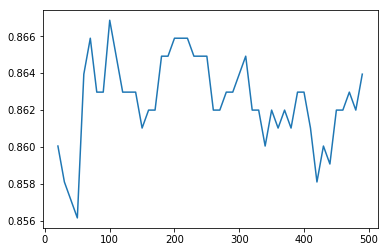

In [27]:
plt.plot(np.arange(20,500,10),oob,"-")

In [28]:
## Select a tree model with 100 trees
mod_final=ensemble.RandomForestClassifier(n_estimators=100,random_state=200,oob_score=True).fit(X_train,y_train)

In [29]:
mod_final.oob_score_

0.8668610301263362

In [37]:
## Model evaluation on test data
y_pred=mod_final.predict_proba(X_test)[:,1]

In [38]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)

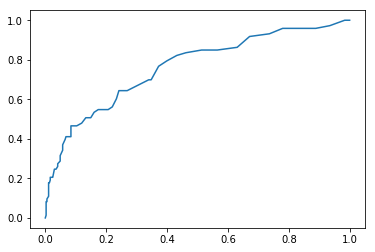

In [39]:
plt.plot(fpr,tpr,"-")

In [40]:
metrics.roc_auc_score(y_test,y_pred)

0.76139070875521142

In [79]:
gains=pd.DataFrame()

In [80]:
gains['Target']=y_test

In [81]:
gains["P.Decile"]=pd.qcut(y_pred,q=10)

In [82]:
gains=gains.groupby("P.Decile",as_index=False)['Target'].agg([np.sum,np.size]).reset_index().rename(columns={"sum":"Events","size":"Number"})

In [83]:
gains=gains.sort_values("P.Decile",ascending=False)

In [85]:
gains["EventRate"]=gains["Events"]/gains["Events"].sum()

In [86]:
gains["CumRate"]=gains["EventRate"].cumsum()

In [87]:
gains

,P.Decile,Events,Number,EventRate,CumRate
9,"(0.38, 0.8]",23,41,0.315068,0.315068
8,"(0.26, 0.38]",14,45,0.191781,0.506849
7,"(0.19, 0.26]",7,44,0.095890,0.602740
6,"(0.15, 0.19]",7,46,0.095890,0.698630
5,"(0.11, 0.15]",9,43,0.123288,0.821918
4,"(0.09, 0.11]",2,32,0.027397,0.849315
3,"(0.07, 0.09]",1,44,0.013699,0.863014
2,"(0.05, 0.07]",5,44,0.068493,0.931507
1,"(0.03, 0.05]",2,43,0.027397,0.958904
0,"(-0.001, 0.03]",3,59,0.041096,1.000000
